# Project 6: Visualizing Monetary Policy

In [5]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import datetime

<AxesSubplot: xlabel='DATE'>

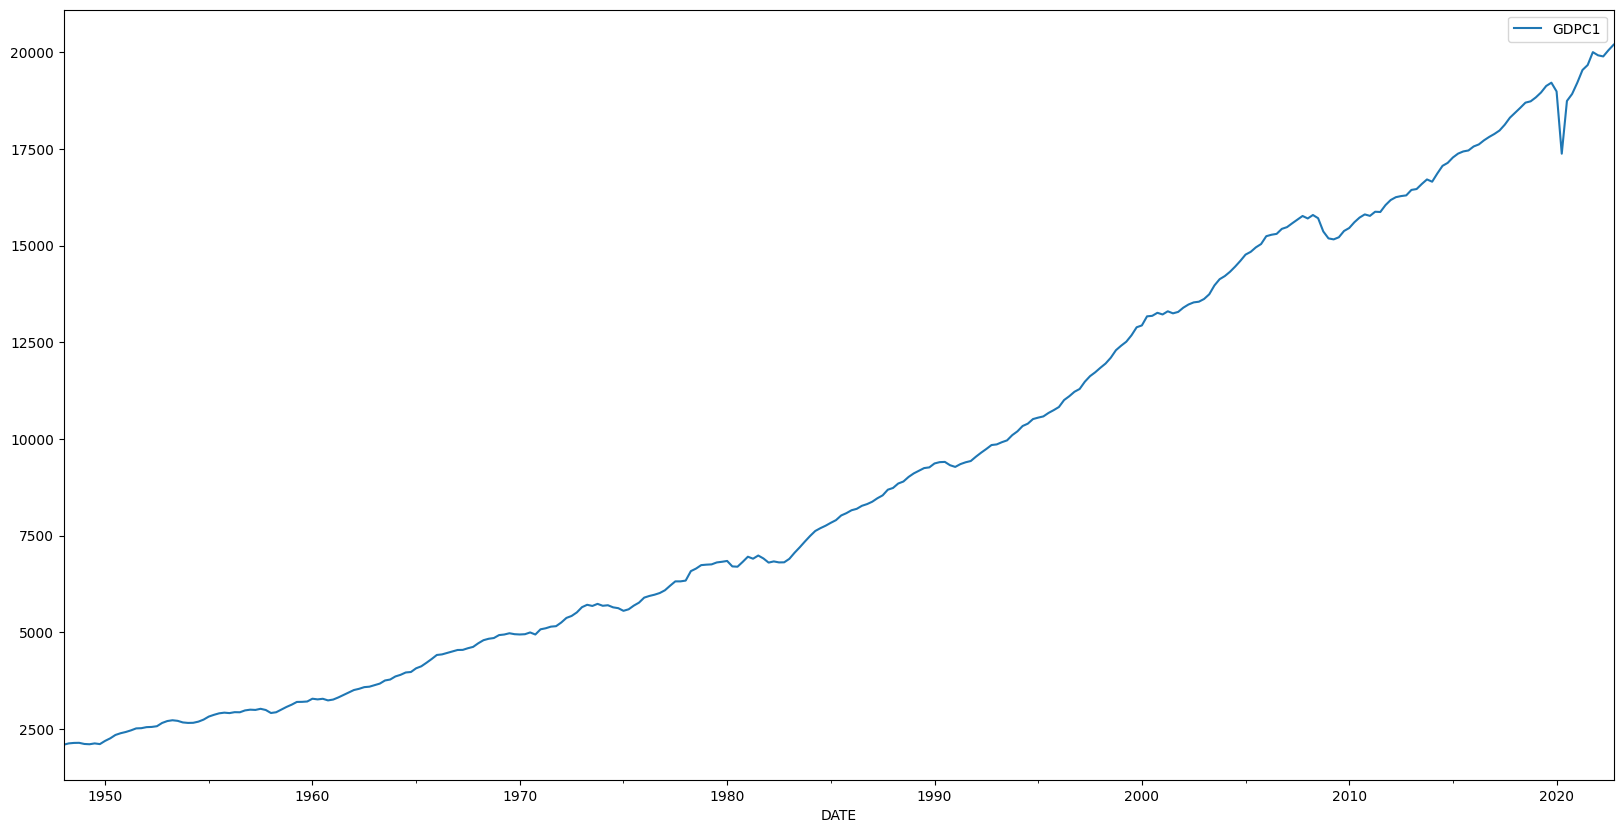

In [6]:
start = datetime.datetime(1948, 1, 1)
end = datetime.datetime.today()
df = web.DataReader("GDPC1", "fred", start, end).resample("Q").mean()
df.plot.line(figsize = (20,10))

In [15]:
def gather_data(data_codes,
                start, 
                end = datetime.datetime.today(),
                freq = "M"):
    df_init = False
    for key, code in data_codes.items():
        if df_init == False:
            df = web.DataReader(
                code, "fred", start, end).resample(freq).mean() # .first() .last() .max() .median() etc are other options
            df.rename(columns = {code:key}, inplace = True)
            df_init = True
        else:
            df[key] = web.DataReader(code, "fred", start, end).resample(freq).mean()
    return df

In [18]:
data_codes  = {"Base: Total": "BOGMBASEW",
               "Base: Currency in Circulation": "WCURCIR"}
start = datetime.datetime(2002, 1, 1)
end = datetime.datetime.today()
data = gather_data(data_codes = data_codes, 
                   start = start,
                   end = end,
                   freq = "W")
data

Base: Total  Base: Currency in Circulation
DATE                                                  
2002-01-06     659930.0                        643.044
2002-01-13     659930.0                        638.956
2002-01-20     652179.0                        632.719
2002-01-27     652179.0                        632.017
2002-02-03     649587.0                        630.409
...                 ...                            ...
2020-08-16    4750981.0                       2003.019
2020-08-23    4830999.0                       2007.458
2020-08-30    4830999.0                       2010.991
2020-09-06    4876690.0                       2016.895
2020-09-13    4876690.0                       2026.998

[976 rows x 2 columns]

In [ ]:
data["Base: Currency in Circulation"] = data["Base: Currency in Circulation"] * 1000

<AxesSubplot: xlabel='DATE'>

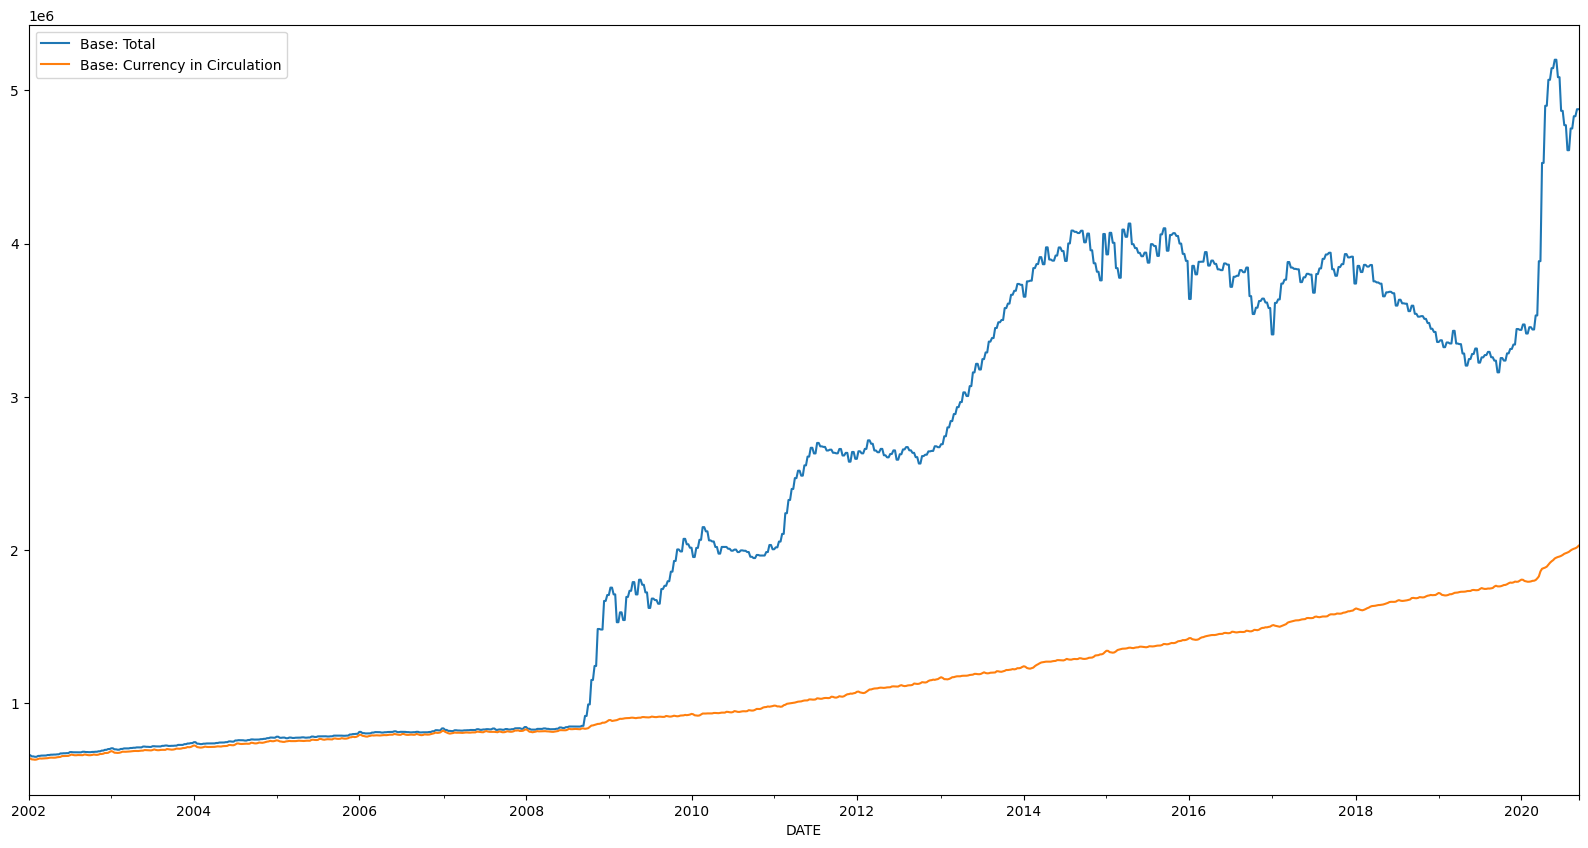

In [22]:
fig, ax = plt.subplots(figsize = (20,10))
data.plot.line(ax = ax)

<AxesSubplot: xlabel='DATE'>

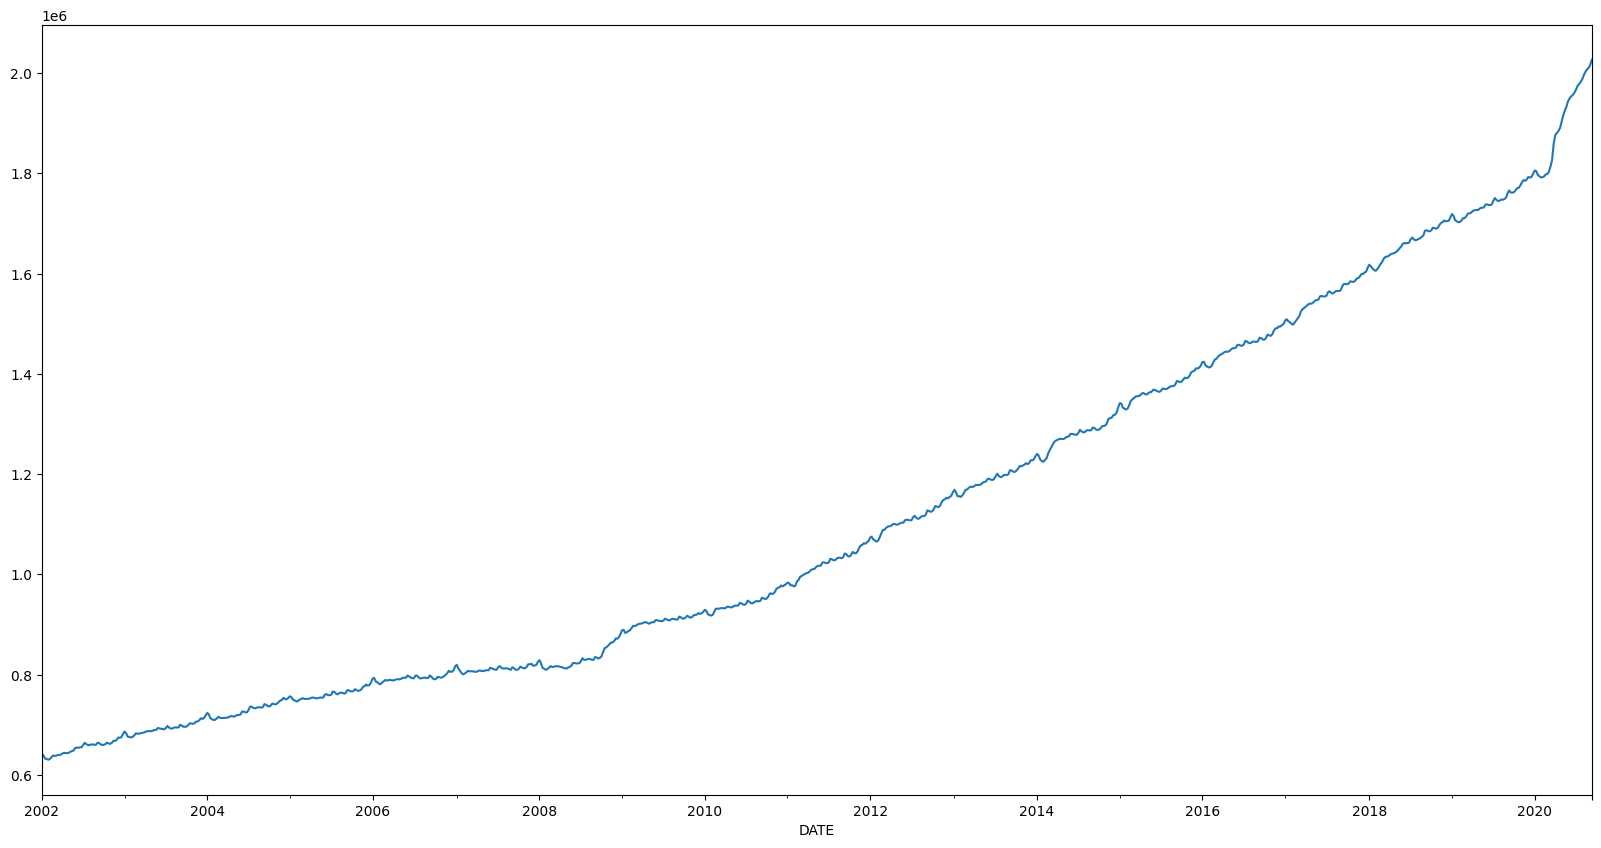

In [23]:
fig, ax = plt.subplots(figsize = (20,10))
data["Base: Currency in Circulation"].plot.line(ax = ax)

In [24]:
data_codes  = {"Base: Total ($ Mil)": "BOGMBASE",
               "Base: Currency in Circulation ($ Mil)": "WCURCIR",
               # Assets
               "Balance Sheet: Total Assets ($ Mil)": "WALCL",
               "Balance Sheet Securities, Prem-Disc, Repos, and Loans ($ Mil)": "WSRLL",
               "Balance Sheet: Securities Held Outright ($ Mil)": "WSHOSHO",
               ### breakdown of securities holdings ###
               "Balance Sheet: U.S. Treasuries Held Outright ($ Mil)":"WSHOTSL",
               "Balance Sheet: Federal Agency Debt Securities ($ Mil)" : "WSHOFADSL",
               "Balance Sheet: Mortgage-Backed Securities ($ Mil)": "WSHOMCB",
               # other forms of lending
               "Balance Sheet: Repos ($ Mil)": "WORAL",
               "Balance Sheet: Central Bank Liquidity Swaps ($ Mil)" : "SWPT",
               "Balance Sheet: Direct Lending ($ Mil)" : "WLCFLL",
               # unamortized value of securities held (due to changes in interest rates)
               "Balance Sheet: Unamortized Security Premiums ($ Mil)": "WUPSHO",
               # Liabilities
               "Balance Sheet: Total Liabilities ($ Mil)" : "WLTLECL",
               "Balance Sheet: Federal Reserve Notes Outstanding ($ Mil)" : "WLFN",
               "Balance Sheet: Reverse Repos ($ Mil)": "WLRRAL",
               ### Major share of deposits 
               "Balance Sheet: Excess Reserves ($ Mil)": "EXCSRESNW",
               "Balance Sheet: Required Reserves ($ Mil)": "RESBALREQW",
               "Balance Sheet: Total Reserves ($ Mil)": "WRESBAL",
               "Balance Sheet: Deposits from Dep. Institutions ($ Mil)":"WLODLL",
               "Balance Sheet: U.S. Treasury General Account ($ Mil)": "WDTGAL",
               "Balance Sheet: Other Deposits ($ Mil)": "WOTHLB",
               "Balance Sheet: All Deposits ($ Mil)": "WLDLCL",
               # Interest Rates
               "Federal Funds Target (Pre-Crisis)": "DFEDTAR",
               "Federal Funds (Upper) Target":"DFEDTARU",
               "Effective Federal Funds Rate":"DFF",
               "Interest on Excess Reserves":"IOER",
               "Interest on Reserve Balances":"IORB",

               # Req Reserves and Vault Cash
               "Vault Cash ($ Mil)": "TLVAULTW",
               "Vault Cash Used as Req. ($ Mil)": "VAULT",
               }

In [25]:
data = gather_data(data_codes = data_codes,
                  start = start,
                  end = end,
                  freq = "W")

In [42]:
#data["Interest on Reserves"] = data["Interest on Excess Reserves"].fillna(0).add(data[])
data[["Interest on Reserve Balances", "Interest on Excess Reserves"]]

Interest on Reserve Balances  Interest on Excess Reserves
DATE                                                                 
2002-01-06                           NaN                          NaN
2002-01-13                           NaN                          NaN
2002-01-20                           NaN                          NaN
2002-01-27                           NaN                          NaN
2002-02-03                           NaN                          NaN
...                                  ...                          ...
2022-11-06                      3.578571                          NaN
2022-11-13                      3.900000                          NaN
2022-11-20                      3.900000                          NaN
2022-11-27                      3.900000                          NaN
2022-12-04                      3.900000                          NaN

[1092 rows x 2 columns]

<AxesSubplot: xlabel='DATE'>

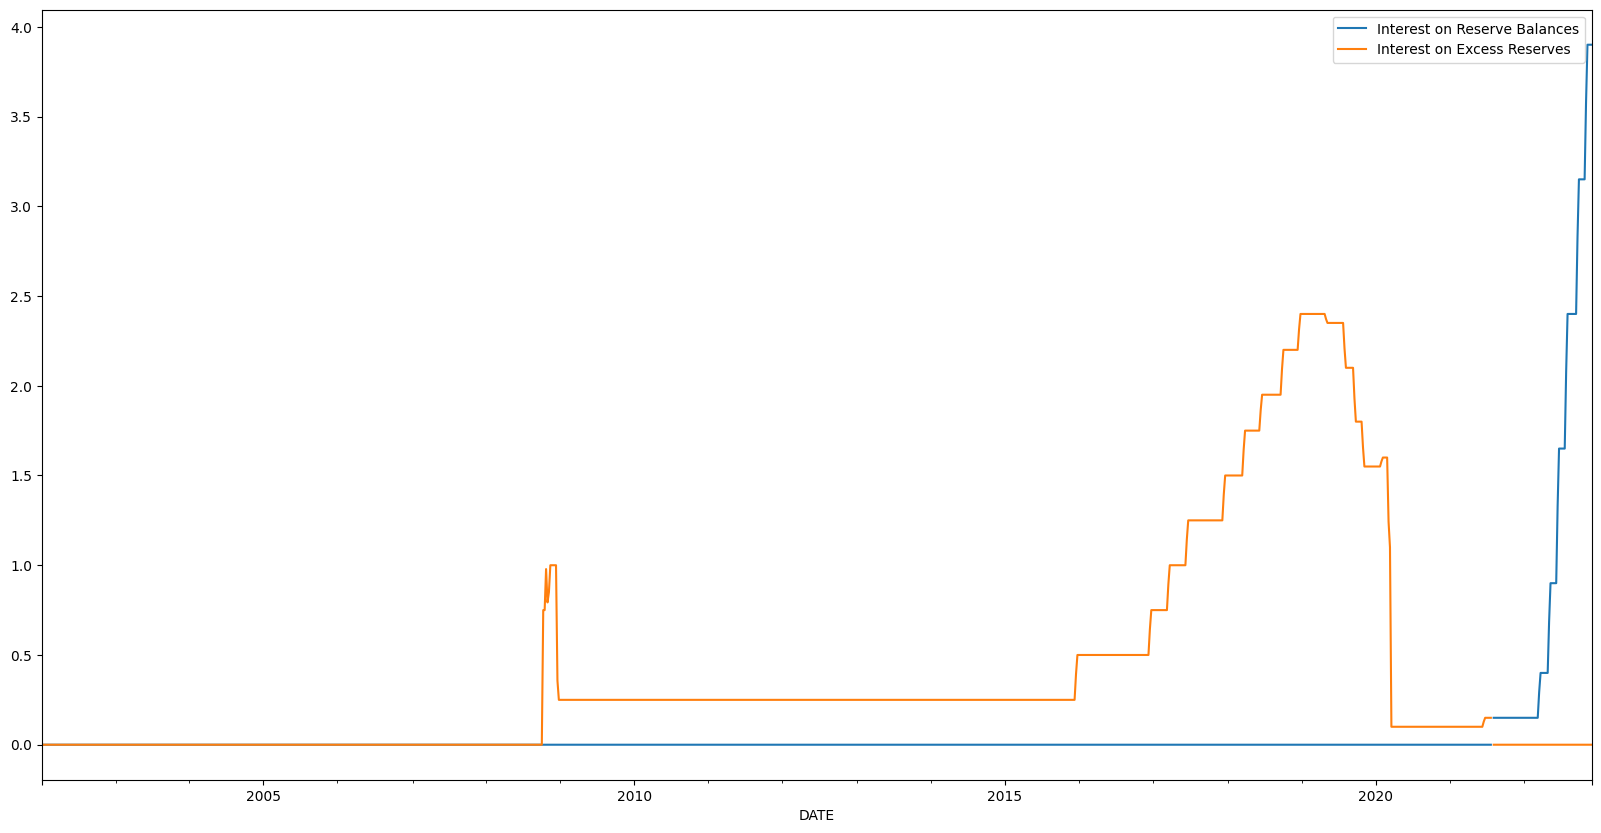

In [44]:
fig, ax = plt.subplots(figsize = (20,10))
plot_data = data[["Interest on Reserve Balances", "Interest on Excess Reserves"]]
match = plot_data[plot_data["Interest on Reserve Balances"] == plot_data["Interest on Excess Reserves"]]
match_date = match.index
match_val = match.sum() / 2
plot_data = plot_data.fillna(0)
plot_data.loc[match_date] = match_val
plot_data.plot.line(ax = ax)